# **Importing the libraries**

In [66]:
import numpy as np 
  
import pandas as pd 
  
import matplotlib.pyplot as plt 

import decimal 

# **Importing the datasets**

In [67]:
train_df = pd.read_csv("/home/somya/Downloads/mnist_train_small.csv")
test_df = pd.read_csv("/home/somya/Downloads/mnist_test.csv")

In [68]:
train_df.head()

,6,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,...,0.581,0.582,0.583,0.584,0.585,0.586,0.587,0.588,0.589,0.590
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [69]:
test_df.head()

,7,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,...,0.658,0.659,0.660,0.661,0.662,0.663,0.664,0.665,0.666,0.667
0,2,0,0,0,0,0,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,0,0,0,0,0,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,0,0,0,0,0,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,0,0,0,0,0,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1,0,0,0,0,0,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# **Arranging the training dataset**

In [70]:
x1 = train_df.drop(['6'], axis = 1).values

x0_train = np.ones((np.shape(x1)[0],1))

x_train = np.hstack((x0_train,x1))

In [71]:
print(x_train)
print(x_train.shape)

[[1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]]
(19999, 785)


In [72]:
y1 = train_df['6']
y_train = y1.to_numpy()
y_train = np.vstack(y_train)

In [73]:
print(y_train)
print(y_train.shape)

[[5]
 [7]
 [9]
 ...
 [2]
 [9]
 [5]]
(19999, 1)


# **Arranging the test dataset**

In [74]:
x2 = test_df.drop(index = 1942 , columns ='7').values

x0_test = np.ones((np.shape(x2)[0],1))

x_test = np.hstack((x0_test,x2))

In [75]:
print(x_test)
print(x_test.shape)

[[1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]]
(1942, 785)


In [76]:
y2 = test_df['7']
y_test = y2.drop(index = 1942).values
y_test = np.vstack(y_test)

In [77]:
print(y_test)
print(y_test.shape)

[[2]
 [1]
 [0]
 ...
 [5]
 [7]
 [8]]
(1942, 1)


# **Visualising the data**

In [78]:
digit = x1[0]
digit_image = digit.reshape(28,28)

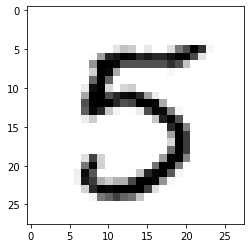

In [79]:
plt.imshow(digit_image, cmap = plt.cm.binary)

# **Implementation of model**

In [80]:
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [81]:
y_enc = np.zeros([y_train.shape[0], np.unique(y_train).shape[0]])

for i in range(np.unique(y_train).shape[0]):
    for j in range(0, len(y_enc)):
        if y_train[j] == np.unique(y_train)[i]:
            y_enc[j, i] = 1
print(y_enc)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 ...
 [0. 0. 1. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 0.]]


In [82]:
y_enc.shape

(19999, 10)

In [83]:
theta = np.zeros((x_train.shape[1], y_enc.shape[1]))
theta.shape

(785, 10)

In [84]:
def hypothesis(theta, x):
    
    z = np.dot(x, theta)
    
    sigmoid = np.array(1/(1 + (np.exp(-z))))                
        
    return sigmoid

In [85]:
    def cost_function(x, y, theta):
        
        z = np.dot(x, theta)
        
        y1 = -y * np.log(hypothesis(z))
        
        y0 = -(1 - y) * np.log(1 - hypothesis(z))
        
        return np.sum(y1 + y0) / x.shape[0]

In [86]:
def gradient_descent(x, y, theta, learning_rate, iterations):

    #cost = [[] for i in range(10)]
    for i in range(iterations):
        print(i)
        for j in range(theta.shape[1]):
            
            h = hypothesis(theta[:,j], x)
                
            theta[:,j] = theta[:,j] - (learning_rate/x.shape[0]) * np.dot(x.T,(h-y[:,j]))
            
            #c =cost(X, y.iloc[:, j], theta.iloc[:,j])
            #cost[j].append(c)
    return theta

In [99]:
theta = gradient_descent(x_train, y_enc, theta, 0.02, 150)

0


<ipython-input-84-39720c721178>:5: RuntimeWarning: overflow encountered in exp
  sigmoid = np.array(1/(1 + (np.exp(-z))))


1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149


In [100]:
print(theta)
theta.shape

[[-0.03787624 -0.00821387 -0.0227688  ... -0.00366669 -0.13970102
  -0.05899432]
 [ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   0.        ]
 ...
 [ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   0.        ]]


(785, 10)

In [101]:
theta1 = pd.DataFrame(theta)
theta1.head(20)

,0,1,2,3,4,5,6,7,8,9
0,-0.037876,-0.008214,-0.022769,-0.042767,-0.017971,0.017227,-0.028207,-0.003667,-0.139701,-0.058994
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [102]:
output = np.empty((y_enc.shape[1], y_enc.shape[0]))

for i in range(y_enc.shape[1]):

    h = hypothesis(theta[:,i], x_train)
    
    output[i] = h

<ipython-input-84-39720c721178>:5: RuntimeWarning: overflow encountered in exp
  sigmoid = np.array(1/(1 + (np.exp(-z))))


In [103]:
print(output)
output.shape

[[0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]
 ...
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 1. 0.]]


(10, 19999)

In [104]:
output1 = pd.DataFrame(output)
output1

,0,1,2,3,4,5,6,7,8,9,...,19989,19990,19991,19992,19993,19994,19995,19996,19997,19998
0,0.0,1.0,0.0,0.0,0.0,1.0,0.000000e+00,0.0,0.0,0.0,...,0.0,0.0,0.000000e+00,1.000000e+00,1.0,1.0,0.000000e+00,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0.0,...,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,1.000000e+00,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0,5.682382e-44,0.0,0.0,1.0,...,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0.000000e+00,1.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0.0,...,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,6.795549e-280,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0.0,...,0.0,0.0,0.000000e+00,1.000000e+00,0.0,0.0,0.000000e+00,0.0,0.0,0.0
5,1.0,0.0,0.0,1.0,0.0,0.0,1.000000e+00,1.0,0.0,0.0,...,0.0,0.0,1.000000e+00,7.007365e-98,0.0,0.0,0.000000e+00,0.0,0.0,1.0
6,0.0,0.0,0.0,0.0,0.0,0.0,1.000000e+00,0.0,0.0,0.0,...,0.0,1.0,0.000000e+00,0.000000e+00,0.0,0.0,0.000000e+00,0.0,0.0,0.0
7,0.0,1.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0.0,...,1.0,0.0,8.844110e-205,0.000000e+00,0.0,0.0,0.000000e+00,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0.0,...,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0.000000e+00,0.0,0.0,0.0
9,0.0,0.0,1.0,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0.0,...,1.0,0.0,1.363642e-22,0.000000e+00,0.0,0.0,0.000000e+00,0.0,1.0,0.0


In [105]:
hypothesis(theta[:,9], x_train)

<ipython-input-84-39720c721178>:5: RuntimeWarning: overflow encountered in exp
  sigmoid = np.array(1/(1 + (np.exp(-z))))


array([0., 0., 1., ..., 0., 1., 0.])

In [106]:
y_pred = np.empty((y_enc.shape[0], 1))

for q in range(0, y_enc.shape[0]):
    
    for p in range(0, y_enc.shape[1]):
        
        if (output[p,q] == np.max(output[:,q])):
            
            y_pred[q] = p
            

In [107]:
y_pred

array([[5.],
       [7.],
       [9.],
       ...,
       [2.],
       [9.],
       [5.]])

In [108]:
l = np.hstack((y_train, y_pred))

result = pd.DataFrame(l, columns = ["Actual", "Predicted"])

print(result)

       Actual  Predicted
0         5.0        5.0
1         7.0        7.0
2         9.0        9.0
3         5.0        5.0
4         2.0        2.0
...       ...        ...
19994     0.0        0.0
19995     1.0        1.0
19996     2.0        2.0
19997     9.0        9.0
19998     5.0        5.0

[19999 rows x 2 columns]


In [109]:
from sklearn.metrics import accuracy_score

#print ("Accuracy of the model is: ", accuracy_score(y_pred, y_train))
print ("Accuracy of the model is: ", accuracy_score(y_pred, y_train))

Accuracy of the model is:  0.8577428871443572
